# **DiploDatos Kaggle Competition**

**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Aprendizaje Supervisado**

**Grupo 28**<br>
Docente: Laura Montes

Integrantes:

- Gustavo Alvarez Lupu<br>
- Laura Hayas<br>
- Maria Emilia Santacruz<br>
- Nicolás Ambrosis

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


# sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report
from sklearn.tree import DecisionTreeClassifier

# Trabajamos con los datos de entrenamiento

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,3430,Europa,False,C/123/P,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,Azhah Tronsive,0
1,669,Mars,True,F/126/S,NaN,18.0,False,0.0,0.0,0.0,0.0,0.0,Roswal Sha,1
2,8430,Europa,True,B/343/S,TRAPPIST-1e,33.0,NaN,0.0,0.0,0.0,0.0,0.0,Shaiam Tinganking,1
3,6463,Earth,False,F/1420/P,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,Landa Grifford,0
4,85,Earth,False,G/9/P,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,Gracy Dunnisey,0


## 1. Análisis Exploratorio

In [ ]:
df.dtypes

PassengerId       int64
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported       int64
dtype: object

In [ ]:
df.shape

(7823, 14)

In [ ]:
# utilizamos la clase .describe() para explorar los atributos numéricos 
df.describe()

,PassengerId,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,7823.000000,7661.000000,7669.000000,7668.000000,7635.000000,7665.000000,7654.000000,7823.000000
mean,4345.691039,28.879389,226.078237,455.643062,172.600393,305.023222,295.476744,0.506711
std,2504.576803,14.461548,679.180148,1621.290107,597.923749,1133.423579,1093.485752,0.499987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2182.500000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4345.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6515.500000,38.000000,44.000000,69.000000,28.000000,58.000000,46.000000,1.000000
max,8692.000000,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [ ]:
# analizamos la precencia de datos faltantes
df.isna().sum()

PassengerId       0
HomePlanet      179
CryoSleep       196
Cabin           184
Destination     160
Age             162
VIP             184
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Name            184
Transported       0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7823 entries, 0 to 7822
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   7823 non-null   int64  
 1   HomePlanet    7644 non-null   object 
 2   CryoSleep     7627 non-null   object 
 3   Cabin         7639 non-null   object 
 4   Destination   7663 non-null   object 
 5   Age           7661 non-null   float64
 6   VIP           7639 non-null   object 
 7   RoomService   7669 non-null   float64
 8   FoodCourt     7668 non-null   float64
 9   ShoppingMall  7635 non-null   float64
 10  Spa           7665 non-null   float64
 11  VRDeck        7654 non-null   float64
 12  Name          7639 non-null   object 
 13  Transported   7823 non-null   int64  
dtypes: float64(6), int64(2), object(6)
memory usage: 855.8+ KB


Los últimos dos bloque nos muestran que, a excepción de PassengerID y Transported, todos los atributos tienen datos faltantes. Por lo tanto va a ser importante tomar una decisión acerca de qué hacer con esos datos.

<AxesSubplot:>

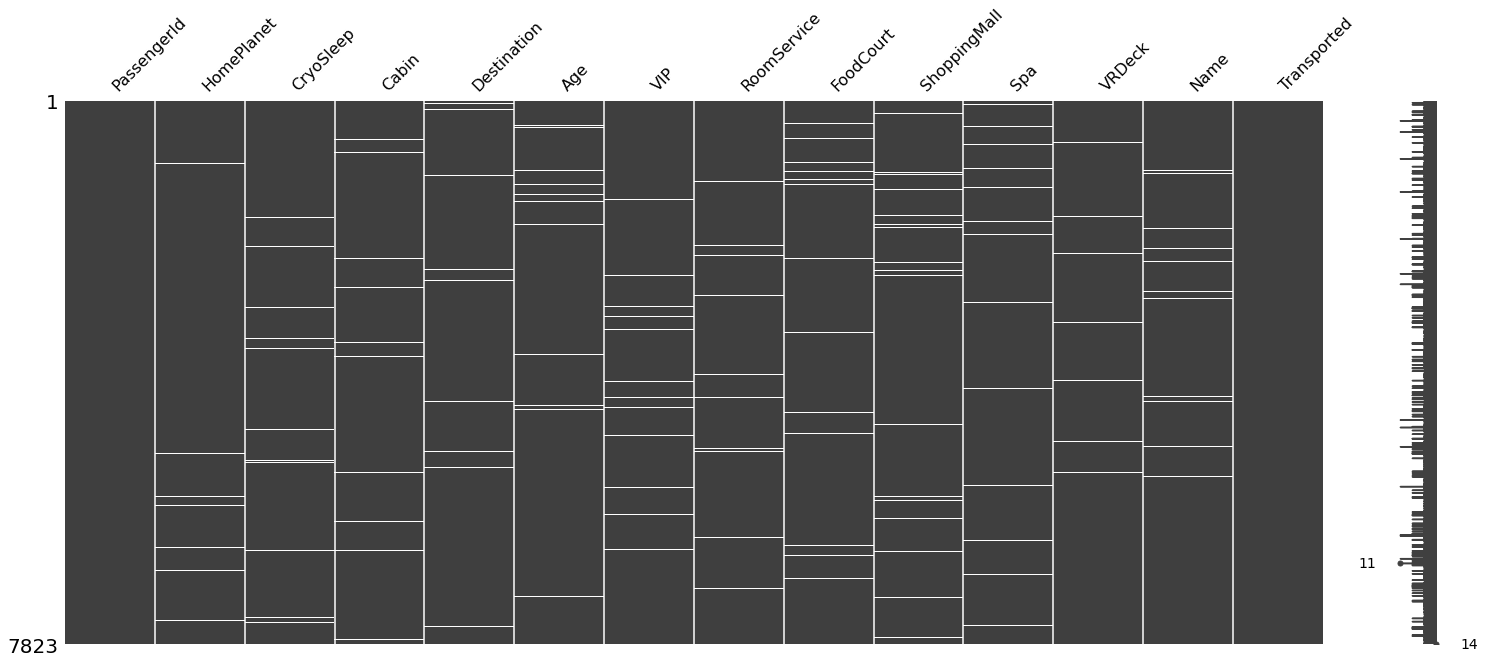

In [ ]:
# analizamos la distribución de datos faltantes utilizando la librería missingno
msno.matrix(df)

In [ ]:
# analizamos que cántidad de datos únicos tenemos para cada atributo
for i in df:
    print('='*50)
    print(f'Atributo:{i}')
    print(f'Valores Únicos: {df[i].nunique()}')
    print(df[i].unique())

Atributo:PassengerId
Valores Únicos: 7823
[3430  669 8430 ... 8076 3829 7624]
Atributo:HomePlanet
Valores Únicos: 3
['Europa' 'Mars' 'Earth' nan]
Atributo:CryoSleep
Valores Únicos: 2
[False True nan]
Atributo:Cabin
Valores Únicos: 6009
['C/123/P' 'F/126/S' 'B/343/S' ... 'G/459/S' 'F/1772/P' 'E/253/P']
Atributo:Destination
Valores Únicos: 3
['TRAPPIST-1e' nan 'PSO J318.5-22' '55 Cancri e']
Atributo:Age
Valores Únicos: 80
[57. 18. 33. 43. 19. 23. 29. 36. 38. 31. 17. 27. 20. 21. 39. nan 46. 49.
 55. 22. 52.  0. 56. 51. 41. 25. 34. 26. 64. 63. 37. 48. 53. 14. 16. 50.
 45.  4. 11. 24. 13.  3. 28. 47. 54. 73. 15.  5. 32.  6. 40. 44. 65. 67.
  1. 30. 60. 59.  2.  7. 42. 71. 35. 79. 62. 61.  9. 58. 10. 68.  8. 66.
 12. 74. 70. 72. 69. 75. 78. 77. 76.]
Atributo:VIP
Valores Únicos: 2
[False nan True]
Atributo:RoomService
Valores Únicos: 1195
[  0. 142.  90. ... 215. 271. 797.]
Atributo:FoodCourt
Valores Únicos: 1400
[3859.    0. 1208. ... 3315. 2347.  840.]
Atributo:ShoppingMall
Valores Únicos: 

In [ ]:
# Los atributos 'PassengerID' y 'Nane' no van a tener ninguna importancia para entrenar un modelo de ML.
# Por lo tanto decidimos eliminar estas columnas

df.drop(['PassengerId','Name'], axis=1, inplace=True)
df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported'],
      dtype='object')

In [ ]:
# analizamos qué tipo de datos están almacenados en cada columna
df.dtypes

HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
dtype: object

## 2. Curación de datos

### Imputación de datos faltantes

#### Datos Categóricos

In [ ]:
# imputamos los datos faltantes categoricos

# creamos una copia del último df
df_most_frequent = df.copy()

# creamos una variable que contiene lo nombres de las columnas que queremos imputar
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'VIP', 'Destination' ]

 
# Vamos a utilizar 'most_frequent' como estrategia de imputación
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_most_frequent[categorical_cols] = categorical_imputer.fit_transform(df_most_frequent[categorical_cols])


df_most_frequent.isna().sum()

HomePlanet        0
CryoSleep         0
Cabin             0
Destination       0
Age             162
VIP               0
RoomService     154
FoodCourt       155
ShoppingMall    188
Spa             158
VRDeck          169
Transported       0
dtype: int64

#### Datos Numéricos

In [ ]:
# imputamos los datos faltantes de los atributos numericos

# creamos una variable que contiene los nombres de las columnas que queremos imputar
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]


# creamos una copia del último df
df_2 = df_most_frequent.copy()

# Vamos a imputar por la mediana
imputer = SimpleImputer(strategy="median")
df_2[imputer_cols] = imputer.fit_transform(df_2[imputer_cols])

In [ ]:
df_2.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

Con esta úlitma celda confirmamos que después de los pasos de imputación no nos queda ningún atributo que tenga datos faltantes.

#### Atributo Cabin
La columna cabin tiene información que convendría tenerla como atributos separados.

In [ ]:
# dividimos la columna Cabin en 3 columnas separndo por el '/'
df_3 = df_2.copy()
df_3[['Deck', 'Num', 'Side']] = df_3['Cabin'].str.split('/', expand=True)
df_3.drop(columns = 'Cabin', inplace = True)
df_3.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,57.0,False,0.0,3859.0,13.0,195.0,3874.0,0,C,123,P
1,Mars,True,TRAPPIST-1e,18.0,False,0.0,0.0,0.0,0.0,0.0,1,F,126,S
2,Europa,True,TRAPPIST-1e,33.0,False,0.0,0.0,0.0,0.0,0.0,1,B,343,S
3,Earth,False,TRAPPIST-1e,43.0,False,142.0,1208.0,0.0,0.0,204.0,0,F,1420,P
4,Earth,False,TRAPPIST-1e,19.0,False,0.0,0.0,670.0,1.0,34.0,0,G,9,P


#### Codificación de datos categóricos

In [ ]:
# codificamos los datos categoricos

# definimos una variable que contiene los nombres de las columnas categóricas que queremos codificar
categorical_cols_2 = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'Deck', 'Side']


for col in categorical_cols_2:
    df_3[col] = df_3[col].astype(str)
    df_3[col] = LabelEncoder().fit_transform(df_3[col])

df_3.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,57.0,0,0.0,3859.0,13.0,195.0,3874.0,0,2,123,0
1,2,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,1,5,126,1
2,1,1,2,33.0,0,0.0,0.0,0.0,0.0,0.0,1,1,343,1
3,0,0,2,43.0,0,142.0,1208.0,0.0,0.0,204.0,0,5,1420,0
4,0,0,2,19.0,0,0.0,0.0,670.0,1.0,34.0,0,6,9,0


In [ ]:
# todvía nos queda la columna Num como datos categóricos
# qué hacemos?
df_3.dtypes

HomePlanet        int32
CryoSleep         int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Deck              int32
Num              object
Side              int32
dtype: object

### Definimos Atributos y Etiquetas

In [ ]:
# guardamos las etiquetas en una variable y
y = df.Transported
y

0       0
1       1
2       1
3       0
4       0
       ..
7818    1
7819    0
7820    1
7821    0
7822    1
Name: Transported, Length: 7823, dtype: int64

In [ ]:
# guardamos los atributos en una variable X
X = df_3.drop(columns = 'Transported')
X.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,1,0,2,57.0,0,0.0,3859.0,13.0,195.0,3874.0,2,123,0
1,2,1,2,18.0,0,0.0,0.0,0.0,0.0,0.0,5,126,1
2,1,1,2,33.0,0,0.0,0.0,0.0,0.0,0.0,1,343,1
3,0,0,2,43.0,0,142.0,1208.0,0.0,0.0,204.0,5,1420,0
4,0,0,2,19.0,0,0.0,0.0,670.0,1.0,34.0,6,9,0


## 3. Escalado

In [ ]:
# Escalamos los datos
x_names = X.columns
X = StandardScaler().fit_transform(X)

X = pd.DataFrame(X, columns=x_names)
X

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0.433235,-0.737504,0.622444,1.967465,-0.154767,-0.329239,2.124377,-0.262923,-0.092514,3.312022,-1.312321,-0.945999,-1.028924
1,1.689423,1.355926,0.622444,-0.757408,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.372887,-0.940067,0.971889
2,0.433235,1.355926,0.622444,0.290620,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,-1.874058,-0.510990,0.971889
3,-0.822954,-0.737504,0.622444,0.989305,-0.154767,-0.118291,0.473999,-0.284910,-0.266208,-0.078616,0.372887,1.618572,-1.028924
4,-0.822954,-0.737504,0.622444,-0.687539,-0.154767,-0.329239,-0.278040,0.848286,-0.265317,-0.235676,0.934623,-1.171412,-1.028924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7818,1.689423,-0.737504,0.622444,-1.176619,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.372887,1.418863,0.971889
7819,-0.822954,-0.737504,0.622444,1.059174,-0.154767,-0.329239,-0.278040,0.973445,-0.210982,-0.264316,0.934623,-0.281623,0.971889
7820,1.689423,1.355926,0.622444,1.827728,-0.154767,-0.329239,-0.278040,-0.284910,-0.266208,-0.267088,0.372887,2.314584,-1.028924
7821,-0.822954,-0.737504,0.622444,-0.967013,-0.154767,-0.329239,0.244901,-0.076876,-0.266208,-0.248610,-0.188849,-0.688948,-1.028924


## 4. Entrenamiento y test

In [ ]:
# division entranamiento y test
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state = 8)

In [ ]:
x_train.shape, y_train.shape

((6258, 13), (6258,))

In [ ]:
x_test.shape, y_test.shape

((1565, 13), (1565,))

## 5. Planteo modelos


### 1. Decission Tree Classifier

In [ ]:
clfs = [DecisionTreeClassifier(random_state = 1)]
names = ['Árbol de decisión']

trained_models = []
accuracy_models = []
for clf,name in zip(clfs,names):
    print(name)
    clf.fit(x_train, y_train)
    train_predictions = clf.predict(x_train)
    accuracy = accuracy_score(y_train, train_predictions)
    print(f"Accuracy train {name}: %.2f%%" % (accuracy * 100.0))

    train_predictions = clf.predict(x_test)
    accuracy = accuracy_score(y_test, train_predictions)
    print("Accuracy test {name}: %.2f%%" % (accuracy * 100.0))
    # plot_confusion_matrix(clf,x_test,y_test)
    trained_models.append(clf)
    accuracy_models.append(accuracy*100)

Árbol de decisión
Accuracy train Árbol de decisión: 99.94%
Accuracy test {name}: 73.74%


#### Algún tipo de ajuste de hiperparámetros de los modelos elegidos

In [ ]:
grid = GridSearchCV(DecisionTreeClassifier(random_state = 1),
 {'criterion':('gini','entropy'),
 'splitter':("best","random"),
 'max_depth':(10,20,100)})
grid.fit(x_train,y_train)
grid.best_params_


{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

Accuracy train Arbol de decisión: 83.99%
Accuracy test Arbol de decisión: 77.70%


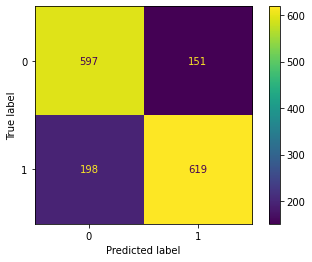

              precision    recall  f1-score   support

           0       0.75      0.80      0.77       748
           1       0.80      0.76      0.78       817

    accuracy                           0.78      1565
   macro avg       0.78      0.78      0.78      1565
weighted avg       0.78      0.78      0.78      1565



In [ ]:
clf = DecisionTreeClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Arbol de decisión: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Arbol de decisión: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
FOLDS=5
cv = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=10)

x_train2 = np.array(x_train)
y_train2 = np.array(y_train)


for clfi, name in zip([DecisionTreeClassifier(**grid.best_params_)],names):
    print(clfi)
    avg_accuracy = 0
    for fold, (train_idx, val_idx) in enumerate(cv.split(x_train2, y_train2)):
        xi, yi = x_train2[train_idx], y_train2[train_idx]
        x_valid, y_valid = x_train2[val_idx], y_train2[val_idx]
        clfi = clfi.fit(xi, yi)

        test_predictions = clfi.predict(x_valid)
        accuracy = accuracy_score(y_valid, test_predictions)
        avg_accuracy +=accuracy
        print(f"Precisión test fold {fold}: {accuracy * 100.0 :.2f}" % ())

    avg_accuracy /= FOLDS
    print(f'Avg. accuracy = {avg_accuracy * 100}')

DecisionTreeClassifier(criterion='entropy', max_depth=10)
Precisión test fold 0: 75.16
Precisión test fold 1: 76.76
Precisión test fold 2: 77.48
Precisión test fold 3: 76.82
Precisión test fold 4: 74.82
Avg. accuracy = 76.20633205895346


### 2. RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 1)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

Accuracy train Random Forest: 99.92%
Accuracy test Random Forest: 80.19%


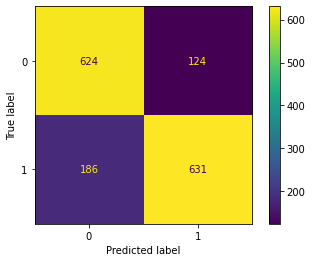

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       748
           1       0.84      0.77      0.80       817

    accuracy                           0.80      1565
   macro avg       0.80      0.80      0.80      1565
weighted avg       0.80      0.80      0.80      1565



In [ ]:
train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Random Forest: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Random Forest: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
grid = GridSearchCV(RandomForestClassifier(random_state = 1),
 {'criterion':('gini','entropy','log_loss'),
  'max_depth':(10,20,100),
 'max_features': ('sqrt', 'log2', None)})

grid.fit(x_train,y_train)

grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}

Accuracy train Random Forest: 86.80%
Accuracy test Random Forest: 80.38%


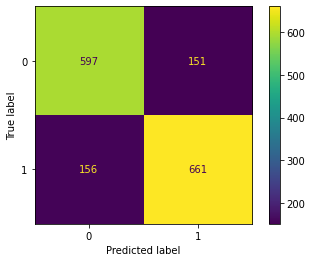

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       748
           1       0.81      0.81      0.81       817

    accuracy                           0.80      1565
   macro avg       0.80      0.80      0.80      1565
weighted avg       0.80      0.80      0.80      1565



In [ ]:
clf = RandomForestClassifier(**grid.best_params_).fit(x_train, y_train)

train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Random Forest: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Random Forest: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

### 3. XGboost

In [ ]:
import xgboost as xgb


gbm = xgb.XGBClassifier(random_state = 1).fit(x_train, y_train)

Accuracy train XGboost: 93.40%
Accuracy test XGboost: 80.19%


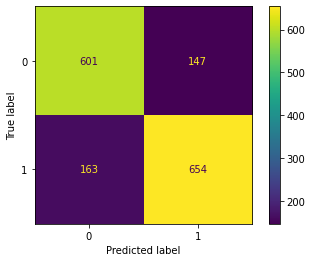

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       748
           1       0.81      0.81      0.81       817

    accuracy                           0.80      1565
   macro avg       0.80      0.80      0.80      1565
weighted avg       0.80      0.80      0.80      1565



In [ ]:
train_predictions = gbm.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train XGboost: %.2f%%" % (accuracy * 100.0))

test_predictions = gbm.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test XGboost: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
# cambiamos los parmetrso
grid = GridSearchCV(xgb.XGBClassifier(random_state = 1),
 {'learning_rate': (0.001, 0.01, 0.1),
  'max_depth' : (4, 10, 20)
 })

grid.fit(x_train,y_train)

grid.best_params_


{'learning_rate': 0.1, 'max_depth': 4}

Accuracy train XGBoost: 83.51%
Accuracy test XGBOost: 80.83%


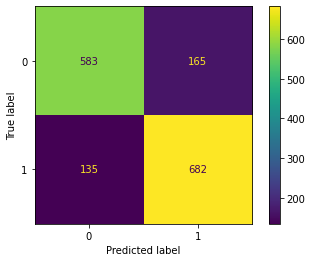

              precision    recall  f1-score   support

           0       0.79      0.80      0.80       748
           1       0.81      0.81      0.81       817

    accuracy                           0.80      1565
   macro avg       0.80      0.80      0.80      1565
weighted avg       0.80      0.80      0.80      1565



In [ ]:
train_predictions = grid.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train XGBoost: %.2f%%" % (accuracy * 100.0))

test_predictions = grid.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test XGBOost: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

### 4. Support Vector Machine

In [ ]:
from sklearn.svm import SVC
clf = SVC(random_state = 1) 
clf.fit(x_train,y_train)

SVC(random_state=1)

Accuracy train Support Vector Machine: 81.03%
Accuracy test Support Vector Machine: 80.77%


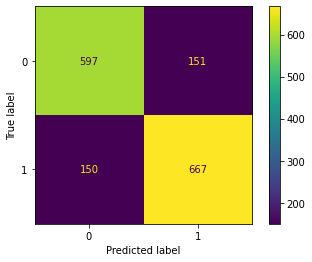

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       748
           1       0.82      0.82      0.82       817

    accuracy                           0.81      1565
   macro avg       0.81      0.81      0.81      1565
weighted avg       0.81      0.81      0.81      1565



In [ ]:
train_predictions = clf.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train Support Vector Machine: %.2f%%" % (accuracy * 100.0))

test_predictions = clf.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test Support Vector Machine: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

In [ ]:
# analizamos otros parámetros
from sklearn.svm import SVC
grid = GridSearchCV(SVC(random_state = 1),
 {'kernel':('rbf', 'poly','sigmoid'),
 'C':(1.0, 10.0)
 })

grid.fit(x_train,y_train)

grid.best_params_

{'C': 1.0, 'kernel': 'rbf'}

Accuracy train SVC(kernel = 'rbf': 81.03%
Accuracy test SVC(kernel = 'rbf'): 80.77%


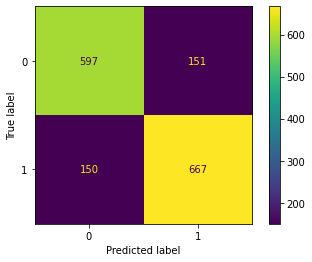

              precision    recall  f1-score   support

           0       0.80      0.80      0.80       748
           1       0.82      0.82      0.82       817

    accuracy                           0.81      1565
   macro avg       0.81      0.81      0.81      1565
weighted avg       0.81      0.81      0.81      1565



In [ ]:
train_predictions = grid.predict(x_train)
accuracy = accuracy_score(y_train, train_predictions)
print("Accuracy train SVC(kernel = 'rbf': %.2f%%" % (accuracy * 100.0))

test_predictions = grid.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print("Accuracy test SVC(kernel = 'rbf'): %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

print(classification_report(y_test,clf.predict(x_test)))

### Resumen

- Accuracy test Árbol de decisión: 73.74%

- Accuracy test Arbol de decisión: 77.70% {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

- Accuracy test Arbol de decisión: 76.20% Stratified K fold

- Accuracy test Random Forest: 80.19%

- Accuracy test Random Forest: 80.38% {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt'}

- Accuracy test XGboost: 80.19%

- Accuracy test XGBOost: 80.83% {'learning_rate': 0.1, 'max_depth': 4}

- Accuracy test Support Vector Machine: 80.77%

- Accuracy test SVC: 80.77% {'C': 1.0, 'kernel': 'rbf'}
    
    

**Decidimos seguir adelante con el modelo de XGBoost ajustando los hiperparámetros de esta manera: {'learning_rate': 0.1, 'max_depth': 4}**

# Trabajamos con los datos de test 

## 1. Curación de datos

In [ ]:
# Mejor modelo
final_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 4, random_state = 1).fit(x_train, y_train)


In [ ]:
test_df = pd.read_csv('test.csv')

In [ ]:
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,415,Europa,True,NaN,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,Minopus Taptiritty
1,8663,Earth,True,G/1489/S,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,Chrisa Francock
2,4524,Earth,False,G/776/P,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,Elinda Miley
3,8246,Earth,False,E/577/S,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,Karley Goods
4,2935,Europa,False,B/117/S,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,Arkard Sechausive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,5996,Mars,False,F/1212/S,TRAPPIST-1e,54.0,False,676.0,0.0,231.0,379.0,0.0,Anch Perta
866,5478,Earth,True,G/947/S,TRAPPIST-1e,58.0,False,0.0,0.0,0.0,0.0,0.0,Hughy Hessey
867,6760,Earth,True,G/1148/P,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Heidie Kimpson
868,1437,Earth,False,F/293/S,TRAPPIST-1e,18.0,False,765.0,0.0,13.0,0.0,0.0,Herina Oconley


In [ ]:
PassengerId = test_df.PassengerId
PassengerId

0       415
1      8663
2      4524
3      8246
4      2935
       ... 
865    5996
866    5478
867    6760
868    1437
869    5171
Name: PassengerId, Length: 870, dtype: int64

In [ ]:
# Los atributos 'PassengerID' y 'Nane' no van a tener ninguna importancia para entrenar un modelo de ML.
# Por lo tanto decidimos eliminar estas columnas

test_df.drop(['PassengerId','Name'], axis=1, inplace=True)
test_df.columns

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'],
      dtype='object')

### Imputación de datos faltantes

#### Datos Categóricos

In [ ]:
# imputamos los datos faltantes categoricos

# creamos una copia del último df
df_most_frequent_2 = test_df.copy()

# creamos una variable que contiene lo nombres de las columnas que queremos imputar
categorical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'VIP', 'Destination' ]

 
# Vamos a utilizar 'most_frequent' como estrategia de imputación
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_most_frequent_2[categorical_cols] = categorical_imputer.fit_transform(df_most_frequent_2[categorical_cols])


df_most_frequent_2.isna().sum()

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age             17
VIP              0
RoomService     27
FoodCourt       28
ShoppingMall    20
Spa             25
VRDeck          19
dtype: int64

#### Datos Numéricos

In [ ]:
# imputamos los datos faltantes de los atributos numericos

# creamos una variable que contiene los nombres de las columnas que queremos imputar
imputer_cols = ["Age", "FoodCourt", "ShoppingMall", "Spa", "VRDeck" ,"RoomService"]


# creamos una copia del último df
df_4 = df_most_frequent_2.copy()

# Vamos a imputar por la mediana
imputer = SimpleImputer(strategy="median")
df_4[imputer_cols] = imputer.fit_transform(df_4[imputer_cols])

In [ ]:
df_4.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

Con esta úlitma celda confirmamos que después de los pasos de imputación no nos queda ningún atributo que tenga datos faltantes.

#### Atributo Cabin
La columna cabin tiene información que convendría tenerla como atributos separados.

In [ ]:
# dividimos la columna Cabin en 3 columnas separndo por el '/'
df_5 = df_4.copy()
df_5[['Deck', 'Num', 'Side']] = df_5['Cabin'].str.split('/', expand=True)
df_5.drop(columns = 'Cabin', inplace = True)
df_5.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,Europa,True,55 Cancri e,34.0,False,0.0,0.0,0.0,0.0,0.0,B,121,S
1,Earth,True,PSO J318.5-22,13.0,False,0.0,0.0,0.0,0.0,0.0,G,1489,S
2,Earth,False,TRAPPIST-1e,44.0,False,22.0,1.0,0.0,864.0,0.0,G,776,P
3,Earth,False,PSO J318.5-22,63.0,False,0.0,0.0,80.0,0.0,2322.0,E,577,S
4,Europa,False,55 Cancri e,10.0,False,0.0,0.0,0.0,0.0,0.0,B,117,S


#### Codificación de datos categóricos

In [ ]:
# codificamos los datos categoricos

# definimos una variable que contiene los nombres de las columnas categóricas que queremos codificar
categorical_cols_2 = ['HomePlanet', 'CryoSleep', 'VIP', 'Destination', 'Deck', 'Side']


for col in categorical_cols_2:
    df_5[col] = df_5[col].astype(str)
    df_5[col] = LabelEncoder().fit_transform(df_5[col])

df_5.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,1,1,0,34.0,0,0.0,0.0,0.0,0.0,0.0,1,121,1
1,0,1,1,13.0,0,0.0,0.0,0.0,0.0,0.0,6,1489,1
2,0,0,2,44.0,0,22.0,1.0,0.0,864.0,0.0,6,776,0
3,0,0,1,63.0,0,0.0,0.0,80.0,0.0,2322.0,4,577,1
4,1,0,0,10.0,0,0.0,0.0,0.0,0.0,0.0,1,117,1


In [ ]:
# todvía nos queda la columna Num como datos categóricos
# qué hacemos?
df_5.dtypes

HomePlanet        int32
CryoSleep         int32
Destination       int32
Age             float64
VIP               int32
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Deck              int32
Num              object
Side              int32
dtype: object

## Escalado

In [ ]:
# Escalamos los datos
x_names = X.columns
X_test = StandardScaler().fit_transform(df_5)

X_test = pd.DataFrame(X_test, columns=x_names)
X_test

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Num,Side
0,0.506494,1.447786,-1.873124,0.389487,-0.136877,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,-1.873506,-0.950682,0.935414
1,-0.767060,1.447786,-0.634813,-1.050400,-0.136877,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,0.939663,1.704346,0.935414
2,-0.767060,-0.690710,0.603499,1.075147,-0.136877,-0.344213,-0.309830,-0.274152,0.441916,-0.250575,0.939663,0.320548,-1.069045
3,-0.767060,-0.690710,-0.634813,2.377902,-0.136877,-0.385490,-0.310498,-0.152063,-0.309805,1.277745,-0.185604,-0.065673,0.935414
4,0.506494,-0.690710,-1.873124,-1.256098,-0.136877,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,-1.873506,-0.958446,0.935414
...,...,...,...,...,...,...,...,...,...,...,...,...,...
865,1.780047,-0.690710,0.603499,1.760807,-0.136877,0.882864,-0.310498,0.078379,0.019943,-0.250575,0.377029,1.166741,0.935414
866,-0.767060,1.447786,0.603499,2.035071,-0.136877,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,0.939663,0.652427,0.935414
867,-0.767060,1.447786,-0.634813,-0.707570,-0.136877,-0.385490,-0.310498,-0.274152,-0.309805,-0.250575,0.939663,1.042529,-1.069045
868,-0.767060,-0.690710,0.603499,-0.707570,-0.136877,1.049852,-0.310498,-0.254312,-0.309805,-0.250575,0.377029,-0.616863,0.935414


# Generamos la salida - datos de test

In [ ]:
test_id = PassengerId
test_pred = final_model.predict(X_test)
test_pred

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,

In [ ]:
submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["PassengerId", "Transported"])
submission.to_csv("sample_submission.csv", header=True, index=False)

In [ ]:
df_final = pd.read_csv("sample_submission.csv")
df_final

,PassengerId,Transported
0,415,1
1,8663,1
2,4524,0
3,8246,0
4,2935,1
...,...,...
865,5996,0
866,5478,1
867,6760,1
868,1437,0
